# Part 1.

- Columns 0 – 150 represent input variable and ‘target’ represents target variable
- Goal is to use the input variables to correctly identify or predict target variable
- Usage of Python and Jupyter notebook for completing this exercise is preferred but if you are not comfortable, feel free to provide source code and summary in email
- Please summarize your thought and analytics under following sections
- Any pre-analytics steps and your understanding of data before you perform the analytics
- Your choice of analytical algorithms, various steps taken during analytics, any comparisons between other algorithms and your understanding of how this model is performing
- Your final choice of model and summary


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from pprint import pprint
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import figure

In [3]:
# Import Data
dataset = pd.read_csv('Q6_data.csv')
print(dataset.shape)
dataset.head()

(10241, 152)


,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,603.4,-0.008,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,417.4,-0.025,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0


In [4]:
pd.options.display.max_columns = dataset.shape[1]
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10224.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10229.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10232.000000,10241.000000,10241.000000,10241.000000,10241.000000,10185.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10237.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.00000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,0.127977,-0.018351,-0.045335,-0.016402,0.074057,0.004281,-0.007069,10.162148,-0.037253,440.690561,0.029022,1.295237,5.554926,0.003297,-0.019323,24805.348892,-0.006271,-0.021998,-0.021107,0.999999,100.759386,73.867717,0.078163,815.804023,0.000021,-0.005911,0.800015,-0.011853,-0.022019,-0.016284,-0.014501,0.003788,0.666202,-0.013871,-0.022586,3226.648746,-0.028186,-0.039001,0.002625,0.045210,0.000303,0.133723,94.360955,0.092128,0.112985,-0.016920,-0.026017,-18.423399,96.528978,1.500109,749.966355,-0.004967,-0.024786,-0.028969,0.180086,-3.286689,465.471530,0.144799,5274.860454,-0.027518,95.659092,0.995531,-0.002773,-0.011204,3.236305,0.003328,66712.538580,0.000004,-0.009744,3.459363,0.000004,0.180266,-0.023024,-181.609155,-0.000021,-0.128154,-0.002770,-0.000006,0.033116,5079.200093,-0.002410,-0.014035,-0.091643,1.200283,0.038069,-0.009836,-0.026143,21.742855,-0.001472,0.003306,3023.987513,-0.003670,853.508739,0.480110,0.067494,138.846109,-0.119871,3.100002,0.323206,0.003242,0.196976,1.499989,-0.019886,3.099975,0.000023,-0.190249,-0.120047,-0.120041,194.516077,1970.608280,0.035058,3.460312,7.796651,7.571917,-0.025756,-0.028353,0.000086,-0.004557,1.160083,21.715196,1.08179,0.000133,-0.015463,-0.009001,0.004068,6754.334847,1.199946,2384.223318,1.095981,0.199933,-0.000062,0.095912,0.014774,-0.024326,1.081765,-0.025623,-0.000045,0.057776,0.481159,-0.012822,66286.257035,-0.003164,671.230407,-0.021312,0.050167,-7.314472,-0.003216,-0.195913,-0.120027,0.050307,17.452579,0.047945
std,2.018572,0.59784

In [5]:
# Shufffle DataRows 
dataset = dataset.sample(frac=1)

In [6]:

# Split Train and Test Data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


## Data Preprocessing - NaN value
- Handle Null value with `median`

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = imputer.transform(X)

## Handle Imbalance Data

- High volume of rows of `0` label - `10000`
- Retain the `0` label rows in the dataset and generate syntehetic data for the rest to match the data size

In [8]:
# Deal with imbalance Data
print(dataset.groupby(['target']).size())

print(type(dataset.groupby(['target']).size()))

# Generate Synthetic Data for minority classes
smote = SMOTE()
X, y = smote.fit_resample(X, y)

print(X.shape)
print('All Group has 10000 rows after SMOTE')
print(np.asarray(np.unique(y, return_counts=True)))

target
0    10000
1      101
2       59
3       52
4       29
dtype: int64
<class 'pandas.core.series.Series'>
(50000, 151)
All Group has 10000 rows after SMOTE
[[    0     1     2     3     4]
 [10000 10000 10000 10000 10000]]


In [9]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
# Scale Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Random Forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=41)

In [12]:
# Test prediction. Expect label - 2
print(classifier.predict(sc.transform([[6.5220109520000005,-0.17600000000000002,-0.313,1.083,1.4069999999999998,-0.062,-0.255,9.62955,-0.035,579.573,0.629,1.19354,2,0.0007625,1.5919999999999999,15660,-0.402,-0.086,0.21634027399999997,0.9994069999999999,137.92449530000002,74.3804,-0.29,301,-0.0021030000000000003,0.01678,0.8052,-0.14300000000000002,-0.054000000000000006,-0.006999999999999999,-0.095,0.00470371,0.69801,-0.006999999999999999,-0.047,3243.83,0.11599999999999999,-0.057,-0.9009999999999999,-0.261,-2.207022981,-1.275,94.4058,0.614,-0.579,-0.026000000000000002,-0.156,-98.0143,109.545,1.49101,778.909,1.5519999999999998,-0.081,-0.07200000000000001,0.180024,-64.15,633.5169999999999,1.771,5135.4,-0.027999999999999997,108.21799999999999,0.996185,-0.00155,0.948,0,-0.005527499999999999,66348.2,-0.01251,-0.38299999999999995,3.43437,-0.00471469,0.18040499999999998,-0.354,-302.09,0.01034,-2.826994747,-0.0038399999999999997,-0.00247,1.184823951,5029.16,-0.00994842,-0.297,-0.05416,1.20951,-0.8190000000000001,2.27115995,-0.051,21.6108,0.00619,0.0020965999999999997,2887.96,-0.00112,302,0.478308,-0.14300000000000002,1,-0.12857000000000002,3.08779,11.45835764,0.0001906,0.353338,1.5002,-0.006,3.114,0.00889,-0.17968,-0.129092,-0.12628,347.38199999999995,1943.29,-0.20800000000000002,3.4370300000000005,-125.8,14,-0.025,-0.049,-0.006999999999999999,-0.061,1.1541299999999999,21.5762,1.08155,0.00810898,1.986,0.779,-1.233756845,7015.91,1.2008299999999998,2735,1.0954700000000002,0.196616,0.004311,0.647,1.831,2.025,1.08174,-0.039,-0.00495238,3.5019639560000004,0.477926,-0.063,66084.2,1.03,653.1,-0.05,0.0549716,17.483,2.568315104,-0.21677,-0.12628,0.053065499999999995,17.4046]])))

[2]


In [13]:
# Test Result
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [14]:
# Check Accuracy
cm = confusion_matrix(y_test, y_pred)
# print(cm)
accuracy_score(y_test, y_pred)

0.99968

In [15]:
# Tunning
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 41,
 'verbose': 0,
 'warm_start': False}


In [16]:
importances = classifier.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in classifier.estimators_], axis=0)
feature_names = range(0, X.shape[1])

forest_importances = pd.Series(importances, index=feature_names)
# print(type(forest_importances), forest_importances)

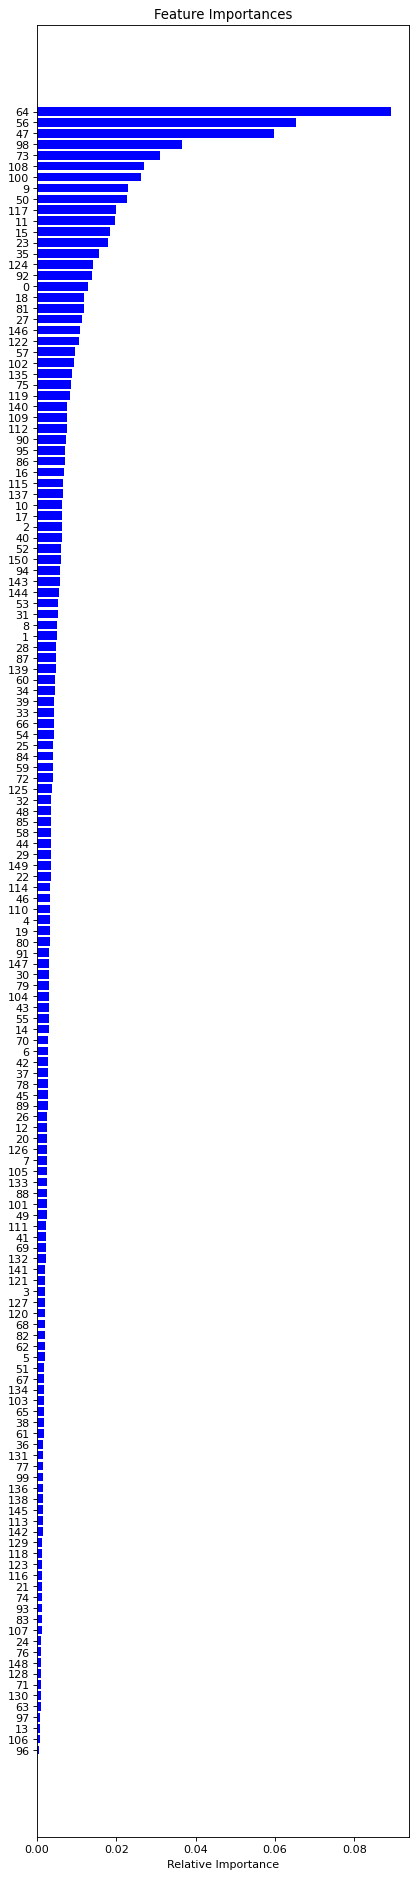

In [17]:
indices = np.argsort(forest_importances)
figure(figsize=(6, 30), dpi=80)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [i for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
# Reduce Feature in training to speed up training process by selecting the important feature

# Set Threshold based on the graph above
select = forest_importances[forest_importances > 0.015]

print('Select Important Columns', type(select), select.index)
selected_col = select.index.values
print('Selected Col in X', selected_col)
X_important_feature = X[:,selected_col]
print(X_important_feature.shape)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_important_feature, y, test_size = 0.25, random_state = 42)

# Feature scaling 
sc_rf = StandardScaler()
X_rf_train = sc_rf.fit_transform(X_rf_train)
X_rf_test = sc_rf.transform(X_rf_test)

# Classifier for reduce feature
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_rf_train, y_rf_train)

# # Check Accuracy
y_rf_pred = classifier_rf.predict(X_rf_test)
cm = confusion_matrix(y_test, y_rf_pred)
# # print(cm)
accuracy_score(y_rf_test, y_rf_pred)

Select Important Columns <class 'pandas.core.series.Series'> Int64Index([9, 11, 15, 23, 35, 47, 50, 56, 64, 73, 98, 100, 108, 117], dtype='int64')
Selected Col in X [  9  11  15  23  35  47  50  56  64  73  98 100 108 117]
(50000, 14)


0.9928

In [19]:
# K Fold Validation - Before Column Reduction
start_time = time.time()

k_fold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=10)
print("Train Data Column Count:", X.shape[1])
print("Accuracy: {:.2f} %".format(k_fold_accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(k_fold_accuracy.std()*100))
print("--- %s seconds ---" % (time.time() - start_time))


Train Data Column Count: 151
Accuracy: 99.96 %
Standard Deviation: 0.03 %
--- 56.28211808204651 seconds ---


In [20]:
# K Fold Validation - After Column Reduction
# Speed improvement after reduce the feature
# TODO: For optimization in the future after knowing the real meaning of the fature/column.
start_time = time.time()
print("Train Data Column Count after filtering:", X_important_feature.shape[1])
k_fold_accuracy = cross_val_score(estimator = classifier_rf, X = X_rf_train, y = y_rf_train, cv=10)
print("Accuracy: {:.2f} %".format(k_fold_accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(k_fold_accuracy.std()*100))
print("--- %s seconds ---" % (time.time() - start_time))

Train Data Column Count after filtering: 14
Accuracy: 99.28 %
Standard Deviation: 0.23 %
--- 13.589853048324585 seconds ---


## Apply RandomizedSearchCV to find out best parameter

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10,30,5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 15, 20, 25],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [23]:
rf_random_search = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random_search.fit(X_train, y_train)

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random_search.best_estimator_
evaluate(best_random, X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
0.99984
[[2511    2    0    0    0]
 [   0 2536    0    0    0]
 [   0    0 2438    0    0]
 [   0    0    0 2489    0]
 [   0    0    0    0 2524]]


In [29]:
# Best Param 
bp = rf_random_search.best_params_
bp

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': False}